Corner Detection is used to find important points in the image where the intensity changes sharply (like corners of a box or edges of an object).

ORB is a more advanced method that finds key points and then describes them in a way that allows matching across different images.

At the corners of the squares in chessboard, the color changes sharply from white to black or from black to white. This sharp change happens in two directions: vertical and horizental.

Using corner detection, we can match the corners in the new image(having chessboard) to the corners in the original image, and recognize the chessboard.

A corner detection is a technique used to find specific points in an image where there is a sharp change in intensity or color(these points are called corner). If you rotate, scale, or move the image, corners stay in the same relative position that's why they are reliable for detecting objects. Think of the corner of a book: it's where two edges meet at a sharp angle.

Real life example: a robot cn use corner detection to detect the corner of a box, by knowing the corners it can grasp the boxes in the environment.





In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


If you pass an image in BGR format (as OpenCV does), plt.imshow() will show it incorrectly because the colors will be swapped. In this case, you should convert the image to RGB first (using cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).

When you load an image with OpenCV (cv2.imread()), it’s in BGR format. You need to convert it to RGB before using matplotlib to display it.

plt.imshow() if image is RGB or gray no problem

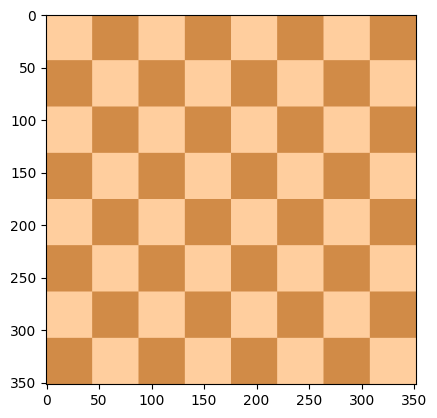

In [4]:
flatchess=cv.imread(r"C:\Users\asus\Desktop\Computer Vision\lab3\flat_chessboard.png")
flatchess=cv.cvtColor(flatchess,cv.COLOR_BGR2RGB)
plt.imshow(flatchess)#without converting it to RGB gives # color so using plt should convert first to RGB to get picture as its original
#cv.imshow("k",flatchess)
#cv.waitKey(0)

cmap='gray' is necessary to tell matplotlib to treat the image as grayscale and display it correctly. 

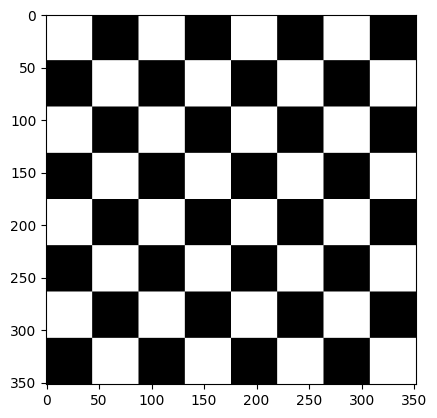

In [15]:
# convert to gray for image preprocessing to get edges
flatgray=cv.cvtColor(flatchess,cv.COLOR_RGB2GRAY)
plt.imshow(flatgray,cmap='gray')

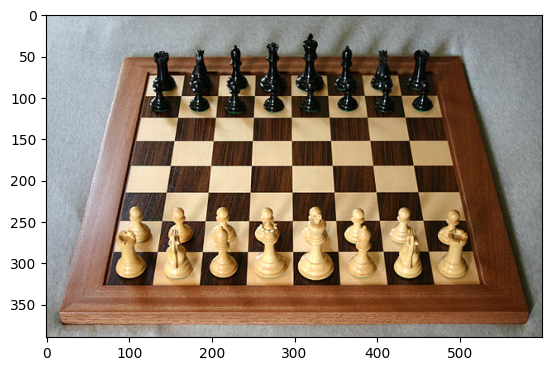

In [8]:
real=cv.imread(r"C:\Users\asus\Desktop\Computer Vision\lab3\real_chessboard.jpg")
real=cv.cvtColor(real,cv.COLOR_BGR2RGB)
plt.imshow(real)

cmap='gray' ensures that the intensity values (from 0 to 255) are shown as different shades of gray (0 is black, 255 is white).

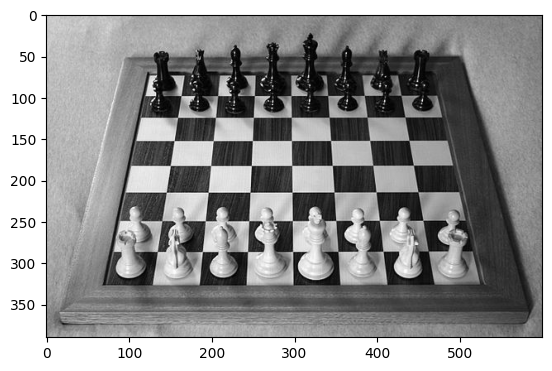

In [14]:
realgray=cv.cvtColor(real,cv.COLOR_RGB2GRAY)
plt.imshow(realgray,cmap='gray')

Corner Detection (Harris corner detection) we have image as gray scale and we convert it to float because harris function in cv takes single channel(gray) and floating point image

Block size: The size of the local neighborhood (usually 2 or 3).

Ksize: The aperture size for the Sobel operator used to calculate gradients.

k: A constant that affects the sensitivity of corner detection.

The Sobel operator calculates the gradient of the image intensity at each pixel. Gradients represent changes in pixel values, and large gradients indicate a sharp change, which typically occurs at edges.Sobel reduce noise by passsing 3*3 matrix so if there is  pixel (noise pixel) with high color merege it with that of normal pixel.

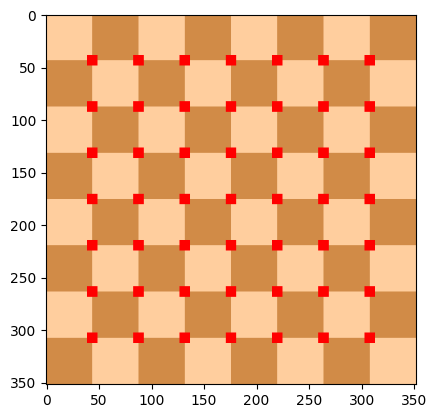

In [ ]:
gray=np.float32(flatgray)#convert it to float
#kernel size is sobel by default (3*3 matrix)(3rows 3columns)for claculting gradiants(edge detection)
dst=cv.cornerHarris(src=gray,blockSize=7,ksize=3,k=0.04)
#dilate :expand or enlarge objects or features in an image.
dst=cv.dilate(dst,None)#becomes clear
#dst is matrix 
#Corner detection (e.g., using cv.cornerHarris) identifies corners as points in an image, but the result can be sparse or weak. Dilation expands these detected points, making the corners more visible and pronounced.
flatchess[dst>0.01*dst.max()]=[255,0,0]#choose stronger corners after dilation
plt.imshow(flatchess)

#so block size : size of corner points which indicates where we have corners
#[255,0,0] brushing color


The dst matrix will have values ranging from 0 to a maximum, where higher values correspond to corners (strong corner response).

Threshould means : This condition selects the corner points that have a value greater than 1% of the maximum value in dst. The dst matrix contains the Harris corner response values, which indicate the strength of the detected corners. After dilation, this condition helps you filter out the stronger corners from the rest of the image.

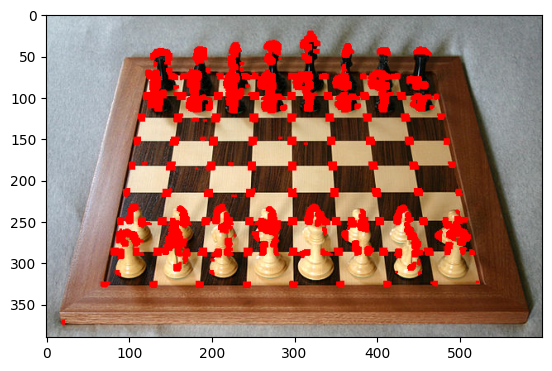

In [26]:
gray2=np.float32(realgray)
dst2=cv.cornerHarris(src=gray2,blockSize=7,ksize=3,k=0.04)
dst2=cv.dilate(dst2,None)
real[dst2>0.01*dst2.max()]=[255,0,0]
plt.imshow(real)
